#  Radiative Pressure vs Stellar Mass

**Theorem 7**: 
 
Rewriting the equation in a dimensionless form
\begin{align*}
    M_\star &= \left(\dfrac{6}{\pi}\right)^{1/2} G^{-3/2} \left[ \dfrac{3}{a} \left( \dfrac{k_B}{\mu_c m_H} \right)^4 \dfrac{1 - \beta^\star}{\beta^{\star 4}} \right]^{1/2}, \\
    \dfrac{M_\star}{M_\odot} &= \left(\dfrac{6}{\pi}\right)^{1/2} \dfrac{G^{-3/2}}{M_\odot} \left[ \dfrac{3}{a} \left( \dfrac{k_B}{\mu_c m_H} \right)^4 \dfrac{1 - \beta^\star}{\beta^{\star 4}} \right]^{1/2}, \\
    \dfrac{M_\star}{M_\odot} &= \left[ \dfrac{6}{\pi} \dfrac{1}{M_\odot^2 G^3} \dfrac{3}{a} \left( \dfrac{k_B}{\mu_c m_H} \right)^4 \dfrac{1 - \beta^\star}{\beta^{\star 4}} \right]^{1/2}, \\
    \dfrac{M_\star}{M_\odot} &= \left[ \dfrac{18}{\pi} \dfrac{k_B^4}{a m_H^4 M_\odot^2 G^3} \dfrac{1}{\mu_c^4} \dfrac{1 - \beta^\star}{\beta^{\star 4}} \right]^{1/2}.   
\end{align*}

Since $\mu_c$ is given, defining the quantities
\begin{align*}
    m &:= \dfrac{M_\star}{M_\odot}, &
    A &:= \dfrac{18}{\pi} \dfrac{k_B^4}{a m_H^4 M_\odot^2 G^3} &:&&
    a &= \dfrac{4\sigma}{c}, &
    x &:= 1 - \beta^\star, &
\end{align*}
leads to
\begin{align*}
    m &= \left[ A \dfrac{1}{\mu_c^4} \dfrac{x}{(1-x)^4} \right]^{1/2}.
\end{align*}

Our plan is use this last equation to compute $m$ as a function of $x$, being $0.5 \leq \mu_c \leq 2$ a parameter. Then, we will plot $x$ vs $m$.

Note that we can rewrite the equation as
\begin{align*}
    m^2 &= A \dfrac{1}{\mu_c^4} \dfrac{x}{(1-x)^4}, \\
    \mu_c^4 m^2 &= A \dfrac{x}{(1-x)^4},
\end{align*}
but this form isn't usefull for our purpouse.

First, let's define the constants

In [2]:
import numpy as np
from astropy import units as u
from astropy import constants as const

# Define A constant
a = 4*const.sigma_sb/const.c        # Radiative pressure const
m_H = 1.00784 << u.u                 # Hydrogen mass
A = 18/np.pi * const.k_B**4/(a * m_H**4 * const.M_sun**2 * const.G**3)

you can verify the constants values and that the $A$ constant is dimensionless, i.e.,

In [4]:
display(a)
display(m_H.to('kg'))
A.decompose()

<Quantity 7.56573325e-16 s W / (K4 m3)>

<Quantity 1.67355769e-27 kg>

<Quantity 29.84097388>

Now, we can define the attributes, i.e., the parameter $\mu_c$ (e.g., as an input) and the domain $x$

In [6]:
mu_i, mu_f, N = 0.5, 2, 6
mu_c = np.linspace(mu_i, mu_f, N, endpoint=True)
mu_c

array([0.5, 0.8, 1.1, 1.4, 1.7, 2. ])

In [7]:
x = np.linspace(0, 0.9, 10000, endpoint=True)
x

array([0.00000000e+00, 9.00090009e-05, 1.80018002e-04, ...,
       8.99819982e-01, 8.99909991e-01, 9.00000000e-01])

Let's make a method that compute $m(x)$ with $A$ and $\mu_c$ as parameters

In [8]:
def mass(x, A, mu_c):
    m = np.sqrt( A/mu_c**4 * x/((1-x)**4) )
    return m.decompose()

Finally, let's the plot $x$ vs $m$

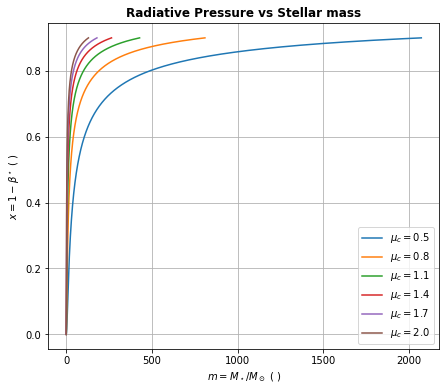

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[7,6])

# plot for all the mu_c parameters
for i in range(len(mu_c)):
    m = mass(x=x, A=A, mu_c=mu_c[i])
    ax.plot(m, x, label= r'$\mu_c =$'+str(mu_c[i]))

ax.grid(True)
ax.set_xlabel(r'$m = M_\star/M_\odot$ ( )')
ax.set_ylabel(r'$x = 1 - \beta^\star$ ( )')
ax.set_title('Radiative Pressure vs Stellar mass',
             fontsize = 12, fontweight ='bold')
lgd = ax.legend()
plt.show()

The plot looks ugly. Mmmm... let's view it in a reduced windows

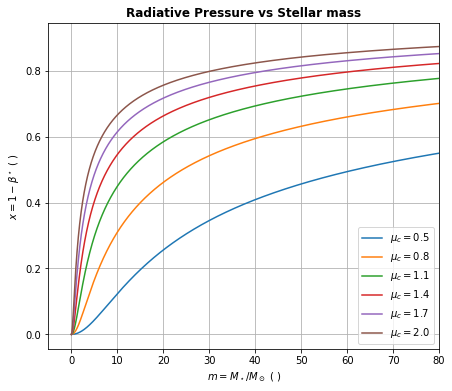

In [11]:
ax.set_xlim(-5, 80)
fig

Now looks good! Let's plot the solar pressure, to have a familiar comparison parameter

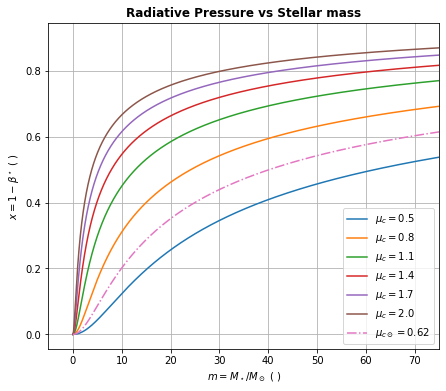

In [8]:
# plot the solar line
mu_c_sun = 0.62
m = mass(x=x, A=A, mu_c=mu_c_sun)
ax.plot(m, x, label= r'$\mu_{c\odot} =$'+str(mu_c_sun), 
        linestyle='-.')

lgd = ax.legend()
fig

Great! But, remember that the physical solutions has the upper bound $\beta = 0.5$, i.e.,

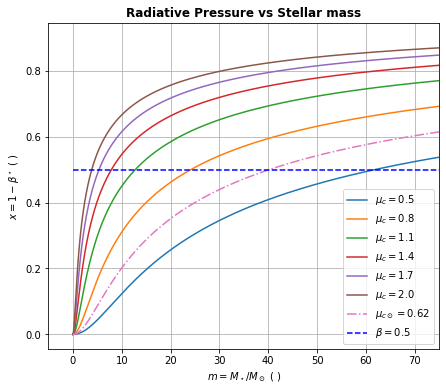

In [9]:
# plot the horizontal line
ax.hlines(0.5, m.min(), m.max().decompose(),
          label=r'$\beta = 0.5$', 
          color='blue', linestyle='dashed')
lgd = ax.legend()
fig

Summarizing, the physical solutions of radiative pressure vs stellar mass are there where the radiative pressure is less that 0.5 (the blue dashed straightline in the figure).

I.e., for a gaseous star the pressure $1-\beta$ at the center cannot exceed an amount (the horizontal line) that only depend of the mass of the star.

For more deatail about the physicial discusion we can see the chapter 2 of Chandrasekhar, S. *An Introduction to the Study of Stellar Structure*, Dover, 2010.